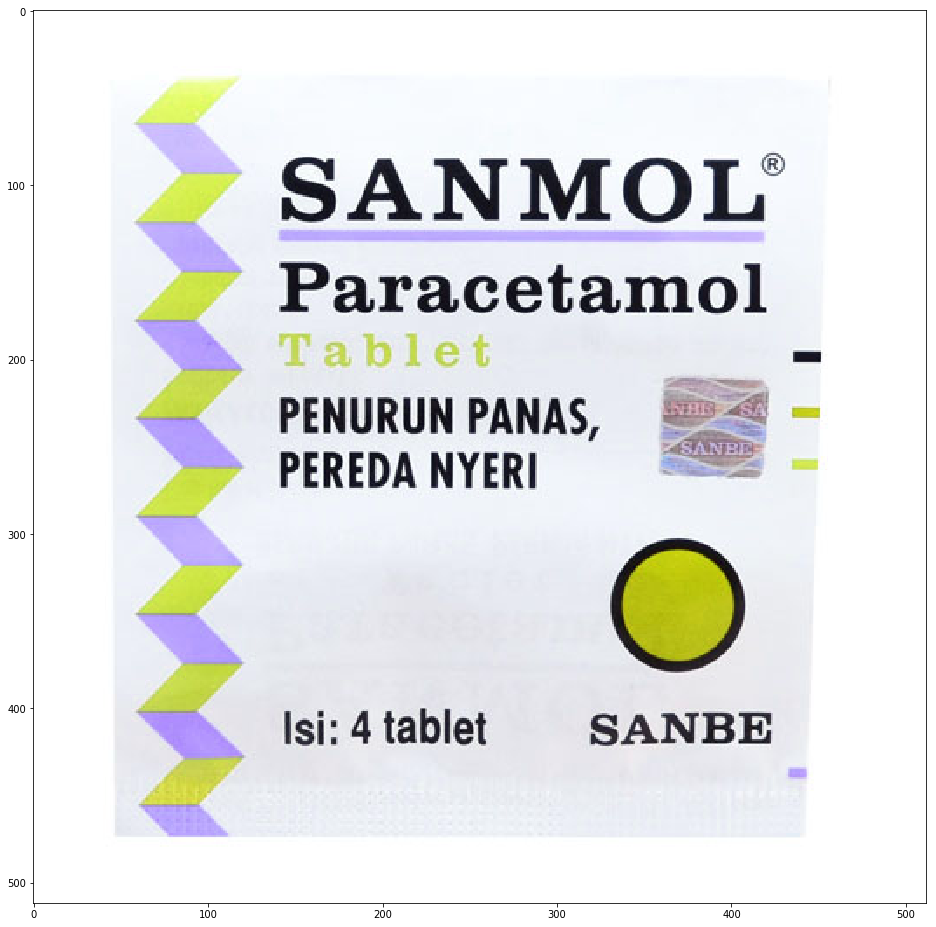

In [45]:
from __future__ import division
import numpy as np
import cv2
import time
from matplotlib import pyplot as plt

img1 = cv2.imread('sanmol.jpg') 
sift = cv2.xfeatures2d.SIFT_create()

plt.figure()
plt.imshow(img1)
plt.show()

True


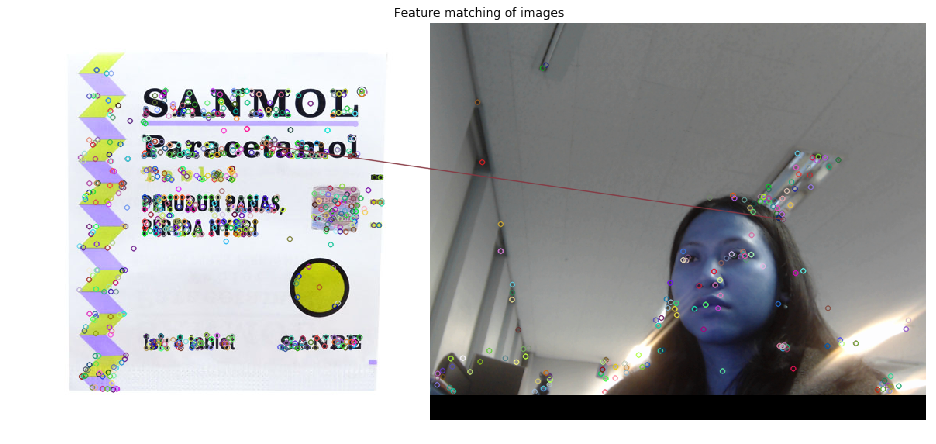

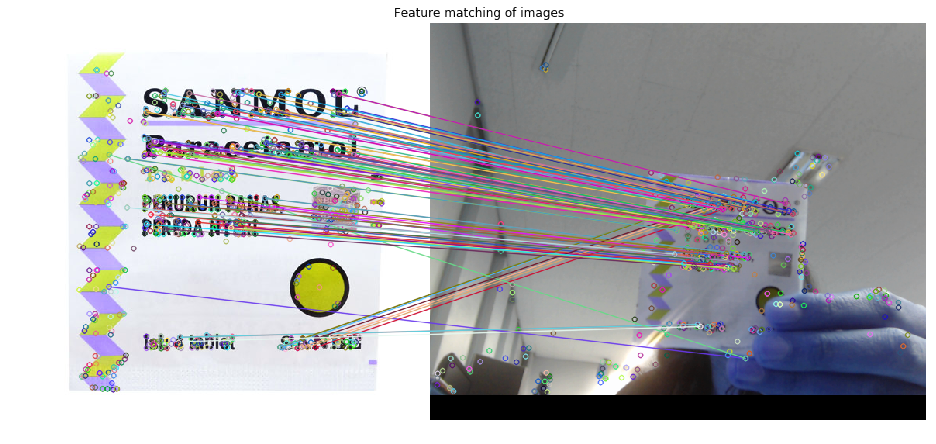

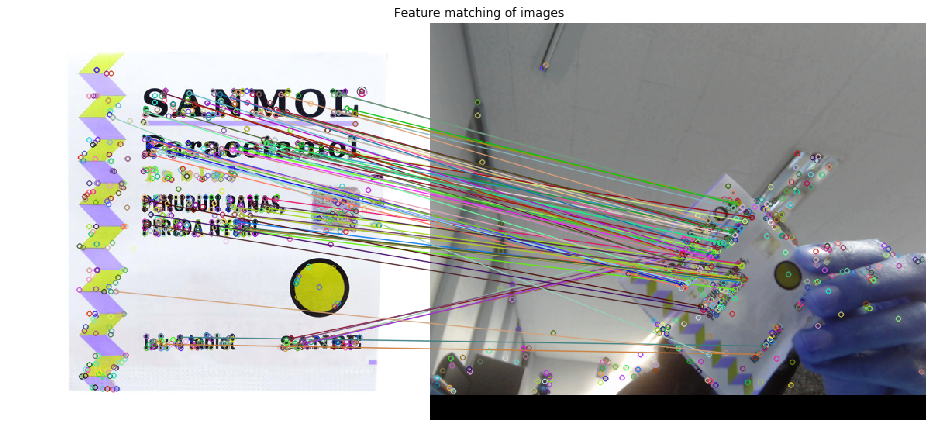

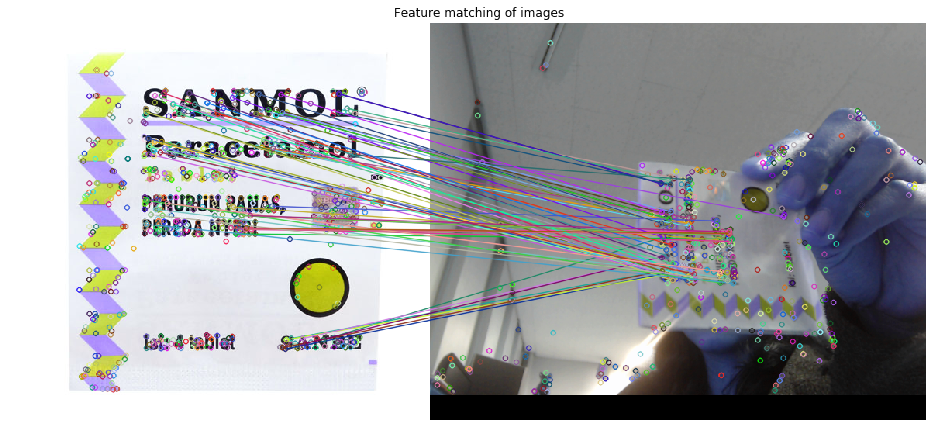

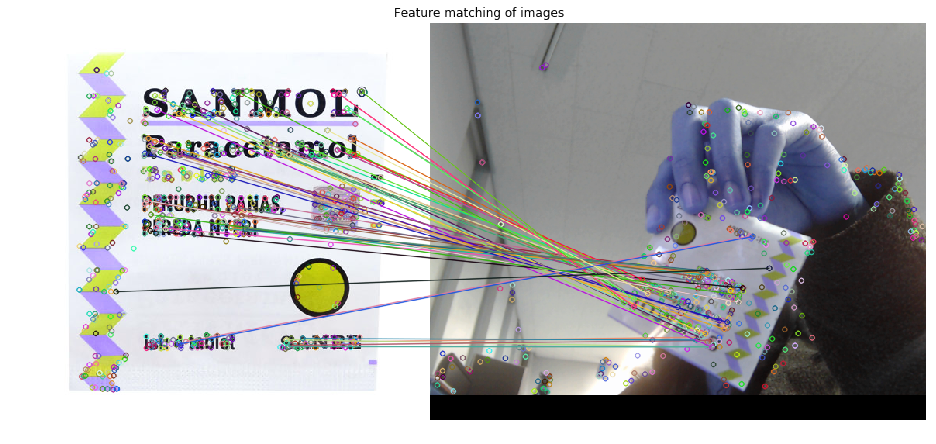

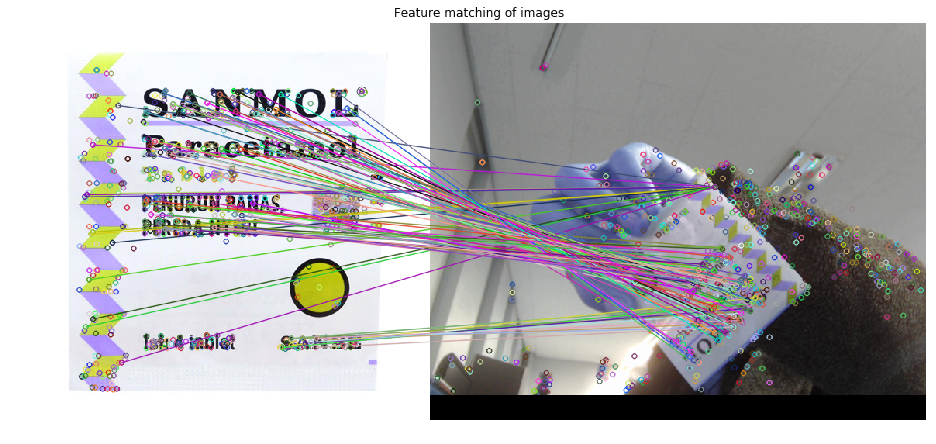

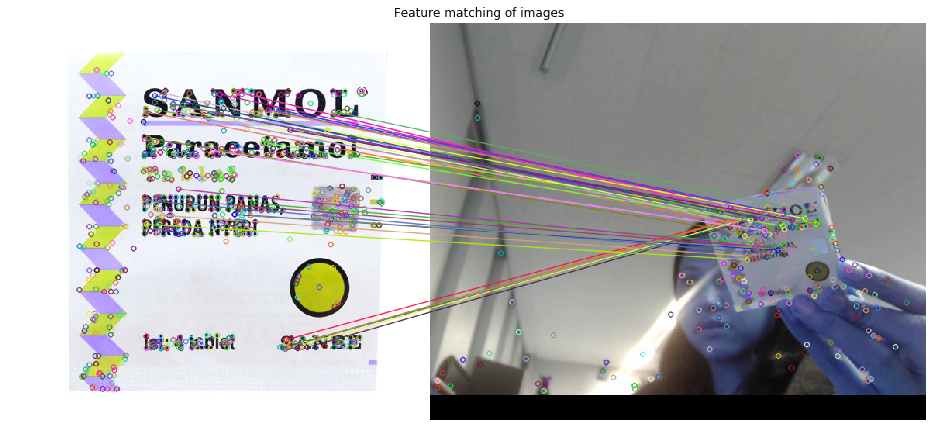

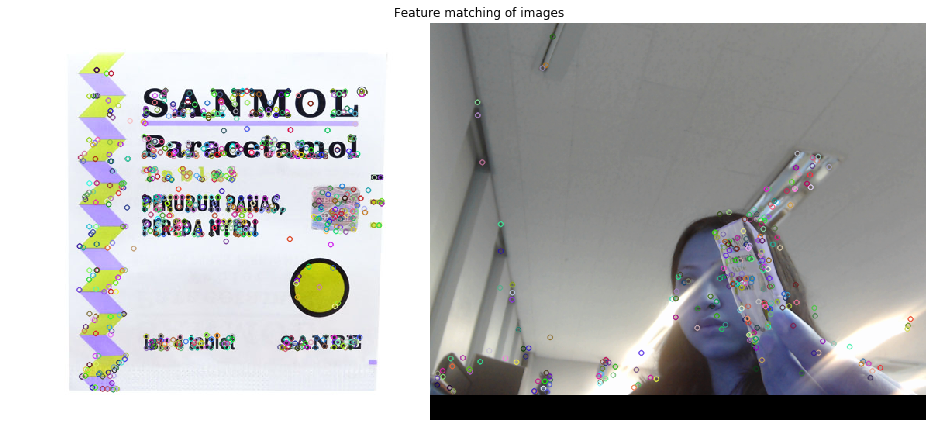

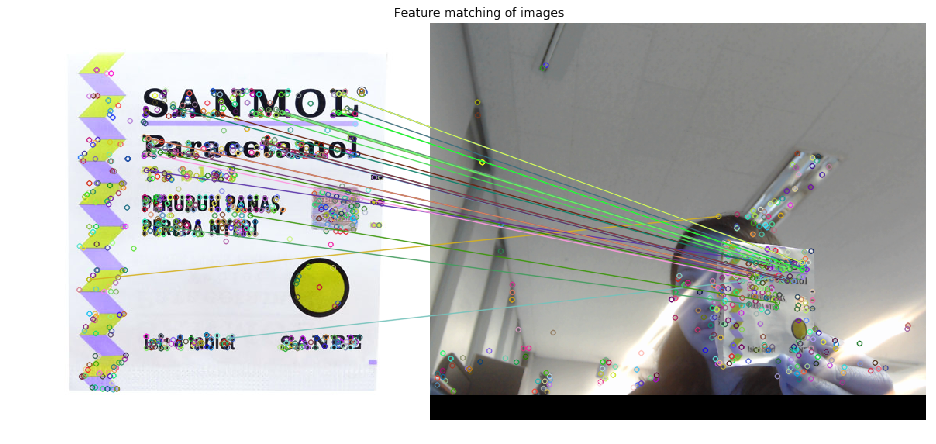

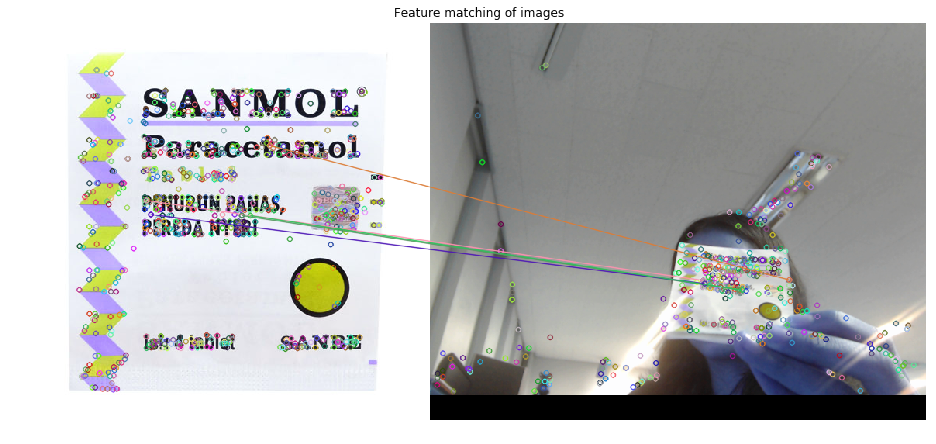

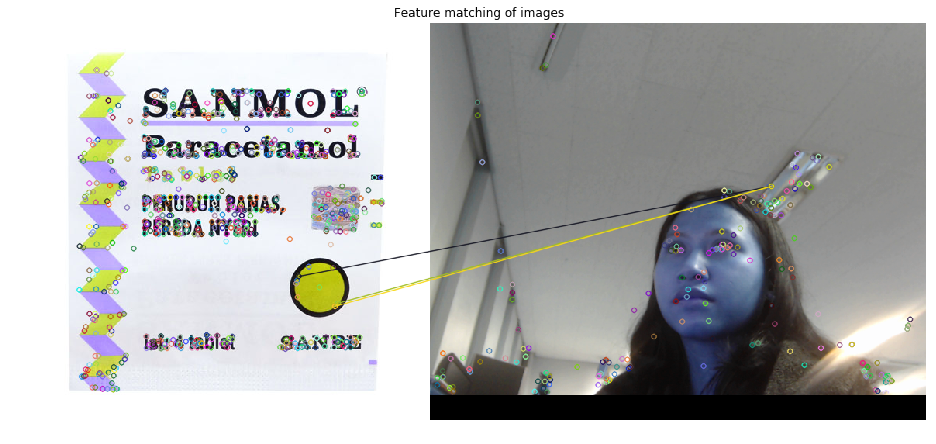

In [46]:
cap = cv2.VideoCapture(0)
print(cap.isOpened())
while True:
    time.sleep(5)
    ret, frame = cap.read()
    if ret == False:
        break
    else:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
        kp1, des1 = sift.detectAndCompute(img1, None)
        kp2, des2 = sift.detectAndCompute(gray, None)

        FLANN_INDEX_KDTREE = 0
        index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
        search_params = dict(checks=50)

        flann = cv2.FlannBasedMatcher(index_params,search_params)
        matches = flann.knnMatch(des1,des2,k=2)
        good_points = []

        matchesMask = [[0,0] for i in range(len(matches))]

        for m, n in matches:
            if m.distance < 0.6*n.distance:
                good_points.append(m)

        img3 = cv2.drawMatches(img1,kp1,frame,kp2,good_points,None)
        
        plt.figure()
        plt.imshow(img3)
        plt.axis("off")
        plt.title("Feature matching of images")
        plt.show()

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()